<a href="https://colab.research.google.com/github/Mohameddfxxcxx/-Boston-Housing-Regression3/blob/main/Copy_of_Burn_Degree_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'burn-dataset13:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4208199%2F7261195%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240823%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240823T164742Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7d13b43a62b58e8679b28600b37fb239f69c939e659c63bd1ee5694cc0ca971f36018aaeae914857f0bc1d11f2b3b05d53f465233e8e0b0dd5a6dfaef8c1a14c320cfc8908324e36a4708a9e996663bac757c430812f564d4a070d15ac93fda311e3f11d9c3d04c7763e22c7e0202adc592a3c32b24c7adcf63e3b4af9427f81a917427964ef2b657c7fdadfd7d4bff95568a54a69635d8ee9b6f8b3f73799f1c8f7d02715d16a46d9f57e43daea2aed352b008d6db6c6d570d362a87bae30f71fad56956748de5ce11a13a09b6acb2b32b5657e62048a7c56da765674b043d66e45a76fceae6dca703b1f21353e5ef5ec562087c8b0f98114763c808c641567'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 18774195 bytes downloaded
Downloaded and uncompressed: burn-dataset13
Data source import complete.


In [2]:
from numpy.random import seed
seed(101)
import tensorflow
tensorflow.random.set_seed(101)
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import itertools
import shutil
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os

# Create the base directory
base_dir = r'/kaggle/working/collect_data_withaug'
os.mkdir(base_dir)

# Create subdirectories under the base directory
degree1 = os.path.join(base_dir, '1')
os.mkdir(degree1)

degree2 = os.path.join(base_dir, '2')
os.mkdir(degree2)

degree3 = os.path.join(base_dir, '3')
os.mkdir(degree3)

In [4]:
# addation image in new folders
import cv2
import os
def copy_image(input_file_path, output_file_path):
    image = cv2.imread(input_file_path)
    cv2.imwrite(output_file_path, image)

input_folder_path1 = '/kaggle/input/burn-dataset13/last_databurn/1st degree'
output_folder_path1 = '/kaggle/working/collect_data_withaug/1'
input_folder_path2 = '/kaggle/input/burn-dataset13/last_databurn/2nd degree'
output_folder_path2 = '/kaggle/working/collect_data_withaug/2'
input_folder_path3 = '/kaggle/input/burn-dataset13/last_databurn/3nd degree'
output_folder_path3 = '/kaggle/working/collect_data_withaug/3'
file_list1 = os.listdir(input_folder_path1)
file_list2 = os.listdir(input_folder_path2)
file_list3 = os.listdir(input_folder_path3)
input_file_paths1 = [os.path.join(input_folder_path1, file_name) for file_name in file_list1]
output_file_paths1 = [os.path.join(output_folder_path1, file_name) for file_name in file_list1]
input_file_paths2 = [os.path.join(input_folder_path2, file_name) for file_name in file_list2]
output_file_paths2 = [os.path.join(output_folder_path2, file_name) for file_name in file_list2]
input_file_paths3 = [os.path.join(input_folder_path3, file_name) for file_name in file_list3]
output_file_paths3 = [os.path.join(output_folder_path3, file_name) for file_name in file_list3]
for input_path1, output_path1 in zip(input_file_paths1, output_file_paths1):
    copy_image(input_path1, output_path1)
for input_path2, output_path2 in zip(input_file_paths2, output_file_paths2):
    copy_image(input_path2, output_path2)
for input_path3, output_path3 in zip(input_file_paths3, output_file_paths3):
    copy_image(input_path3, output_path3)

In [5]:
folder_path = '/kaggle/working/collect_data_withaug/1'
extension = 'jpg'
photo_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(f".{extension}"))
print(f'The number of {extension} files in the 1st Degree folder is: {photo_count}')
folder_path = '/kaggle/working/collect_data_withaug/2'
extension = 'jpg'
photo_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(f".{extension}"))
print(f'The number of {extension} files in the 2nd Degree folder is: {photo_count}')
folder_path = '/kaggle/working/collect_data_withaug/3'
extension = 'jpg'
photo_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(f".{extension}"))
print(f'The number of {extension} files in the 3 folder is: {photo_count}')

The number of jpg files in the 1st Degree folder is: 543
The number of jpg files in the 2nd Degree folder is: 487
The number of jpg files in the 3 folder is: 326


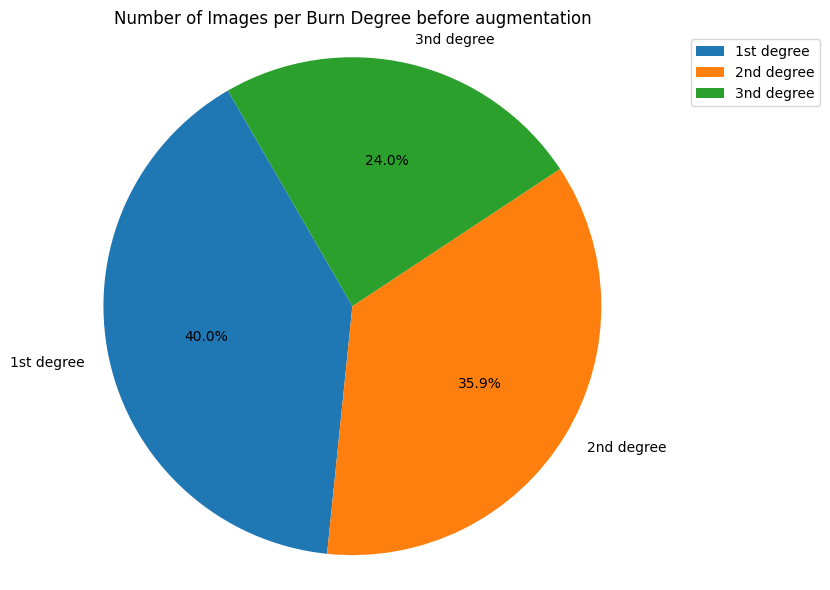

In [6]:
folder_paths1 = [
    '/kaggle/input/burn-dataset13/last_databurn/1st degree',
    '/kaggle/input/burn-dataset13/last_databurn/2nd degree',
    '/kaggle/input/burn-dataset13/last_databurn/3nd degree'
]

extension = 'jpg'
photo_counts = []

for folder_path in folder_paths1:
    photo_count = sum(1 for filename in os.listdir(folder_path)
                      if filename.lower().endswith(f".{extension}"))
    photo_counts.append(photo_count)

# Create class labels based on folder names
class_label = [os.path.basename(path) for path in folder_paths1]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(photo_counts, labels=class_label, autopct="%1.1f%%", startangle=120)
plt.title("Number of Images per Burn Degree before augmentation", fontsize=12)

plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [7]:
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def augment_images(input_directory, output_directory, augmentation_factor):
    # Ensure the output directory exists
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    # Initialize the ImageDataGenerator with desired augmentations
    datagen = ImageDataGenerator(
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
    )
    # Load and augment the original images
    image_files = os.listdir(input_directory)
    def load_and_preprocess_image(image_path):
        # Load the image from the specified path
        img = cv2.imread(image_path)
        # You can add any preprocessing steps here as needed
        # For example, resizing the image to a specific size
        img = cv2.resize(img, (224, 224))  # Replace target_width and target_height
        return img
    for image_file in image_files:
        image_path = os.path.join(input_directory, image_file)
        img = load_and_preprocess_image(image_path)  # Load and preprocess your image as needed
        # Reshape to (1, height, width, channels) for the generator
        img = img.reshape((1,) + img.shape)
        i = 0
        for batch in datagen.flow(img, batch_size=1):
            augmented_image = batch[0].astype('uint8')
            augmented_filename = f"{os.path.splitext(image_file)[0]}_augmented_{i}.jpg"
            augmented_image_path = os.path.join(output_directory, augmented_filename)
            cv2.imwrite(augmented_image_path, augmented_image)
            i += 1
            if i >= augmentation_factor:
                break
# Example usage:
input_directory = '/kaggle/input/burn-dataset13/last_databurn/1st degree'
output_directory = '/kaggle/working/collect_data_withaug/1'
augmentation_factor = 5
augment_images(input_directory, output_directory, augmentation_factor)
input_directory = '/kaggle/input/burn-dataset13/last_databurn/2nd degree'
output_directory = '/kaggle/working/collect_data_withaug/2'
augmentation_factor = 5
augment_images(input_directory, output_directory, augmentation_factor)
input_directory = '/kaggle/input/burn-dataset13/last_databurn/3nd degree'
output_directory = '/kaggle/working/collect_data_withaug/3'
augmentation_factor = 6
augment_images(input_directory, output_directory, augmentation_factor)

In [8]:
folder_path = '/kaggle/working/collect_data_withaug/1'
extension = 'jpg'
photo_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(f".{extension}"))
print(f'The number of {extension} files in the 1st Degree folder is: {photo_count}')
folder_path = '/kaggle/working/collect_data_withaug/2'
extension = 'jpg'
photo_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(f".{extension}"))
print(f'The number of {extension} files in the 2nd Degree folder is: {photo_count}')
folder_path = '/kaggle/working/collect_data_withaug/3'
extension = 'jpg'
photo_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(f".{extension}"))
print(f'The number of {extension} files in the 3rd Degree folder is: {photo_count}')

The number of jpg files in the 1st Degree folder is: 3258
The number of jpg files in the 2nd Degree folder is: 2927
The number of jpg files in the 3rd Degree folder is: 2282


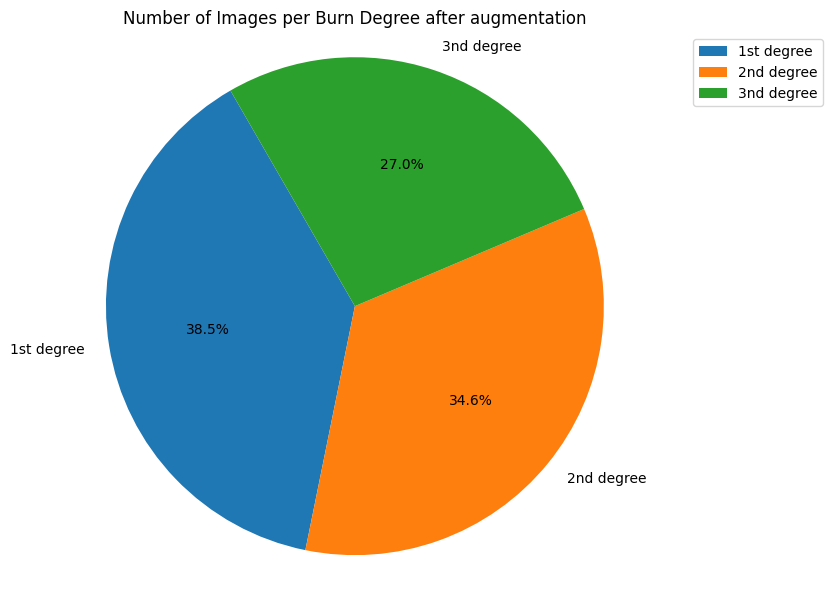

In [9]:
folder_paths = [
    '/kaggle/working/collect_data_withaug/1',
    '/kaggle/working/collect_data_withaug/2',
    '/kaggle/working/collect_data_withaug/3'
]

extension = 'jpg'
photo_counts = []
for folder_path in folder_paths:
    photo_count = sum(1 for filename in os.listdir(folder_path)
                      if filename.lower().endswith(f".{extension}"))
    photo_counts.append(photo_count)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(photo_counts, labels=class_label, autopct="%1.1f%%", startangle=120)
plt.title("Number of Images per Burn Degree after augmentation", fontsize=12)

plt.axis('equal')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [10]:
labels = ['1','2','3']

In [11]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/kaggle/working/collect_data_withaug',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 2282/2282 [00:01<00:00, 1352.73it/s]


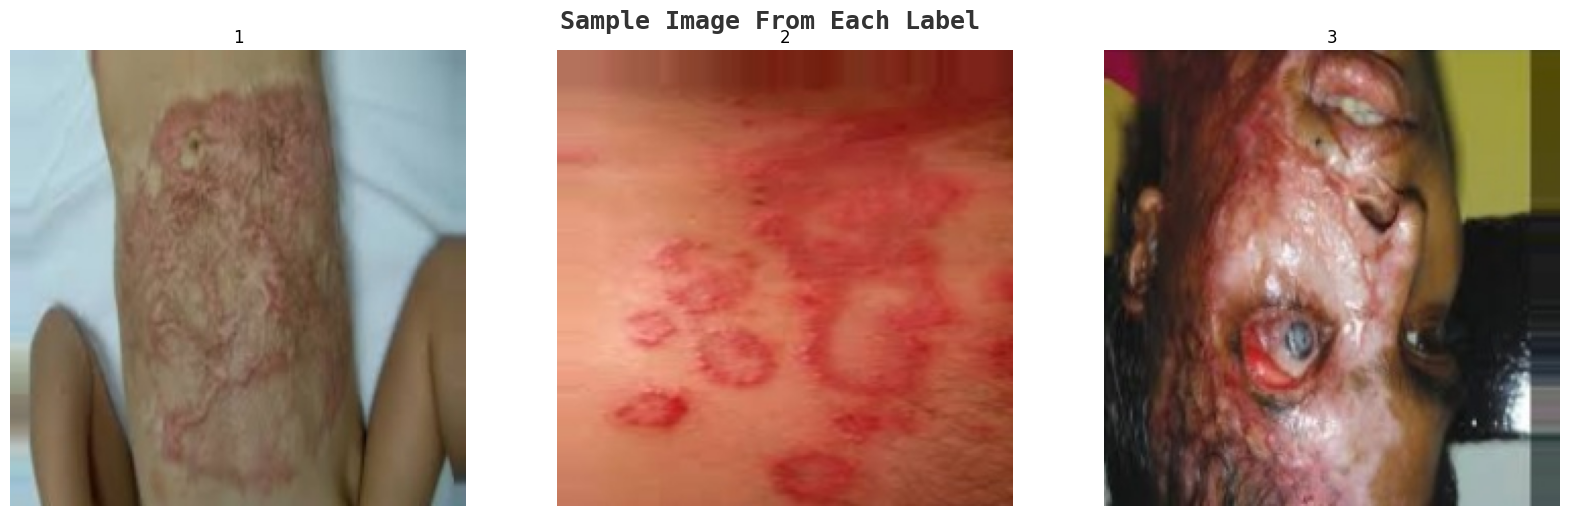

In [12]:
import random

k = 0
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
fig.text(s='Sample Image From Each Label', size=18, fontweight='bold',
         fontname='monospace', y=0.62, x=0.4, alpha=0.8)

for i in labels:
    label_indices = [j for j in range(len(y_train)) if y_train[j] == i]
    random_index = random.choice(label_indices)

    ax[k].imshow(X_train[random_index])
    ax[k].set_title(y_train[random_index])
    ax[k].axis('off')
    k += 1

In [13]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=101)

In [15]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [17]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(3,activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [19]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [20]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

EPOCHS = 65
BATCH_SIZE = 32
best_model_dir = '/kaggle/working/'

os.makedirs(best_model_dir, exist_ok=True)

model_checkpoint = ModelCheckpoint(
    os.path.join(best_model_dir, 'best_model.keras'),  # Change the extension to .keras
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/65
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.6984 - loss: 0.7084
Epoch 1: val_loss improved from inf to 0.65264, saving model to /kaggle/working/best_model.keras
212/212 ━━━━━━━━━━━━━━━━━━━━ 177s 460ms/step - accuracy: 0.6987 - loss: 0.7078 - val_accuracy: 0.7798 - val_loss: 0.6526
Epoch 2/65
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8958 - loss: 0.2726
Epoch 2: val_loss improved from 0.65264 to 0.48919, saving model to /kaggle/working/best_model.keras
212/212 ━━━━━━━━━━━━━━━━━━━━ 88s 135ms/step - accuracy: 0.8958 - loss: 0.2724 - val_accuracy: 0.8453 - val_loss: 0.4892
Epoch 3/65
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9264 - loss: 0.1850
Epoch 3: val_loss improved from 0.48919 to 0.45253, saving model to /kaggle/working/best_model.keras
212/212 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.9265 - loss: 0.1850 - val_accuracy: 0.8447 - val_loss: 0.4525
Epoch 4/65
212/212 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9398 - l

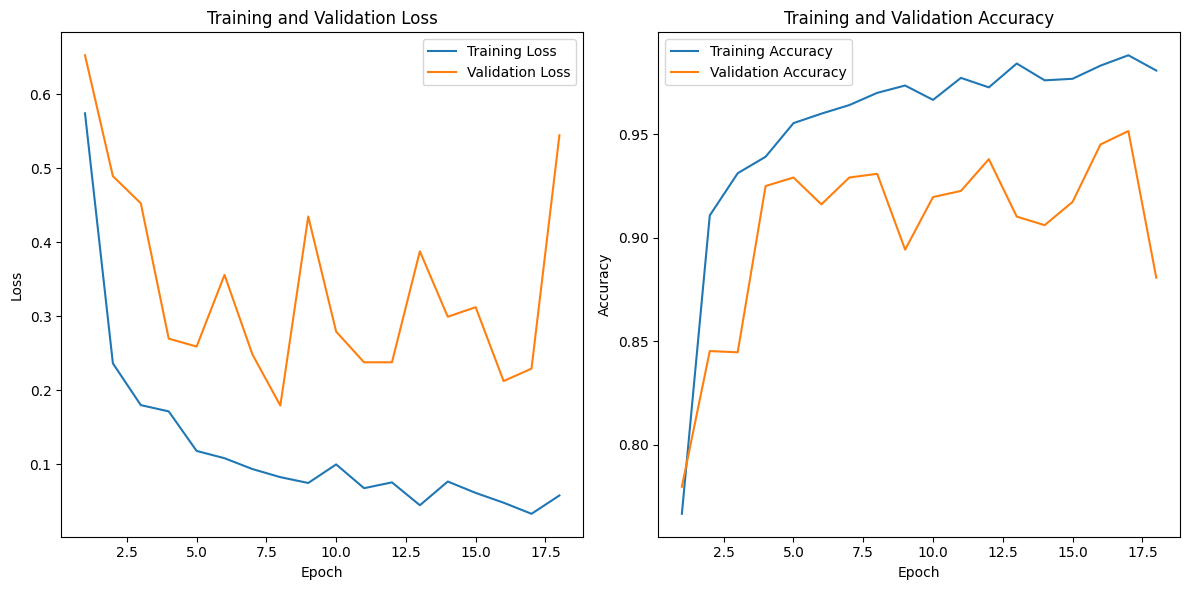

In [21]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable holding the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
model.save('/kaggle/working/my_model_eff2.h5')

In [23]:
from tensorflow.keras.models import load_model

loaded_model_eff = load_model('/kaggle/working/my_model_eff2.h5')

In [24]:
y_pred=loaded_model_eff.predict(X_test)
print(y_pred)
import numpy as np
z=np.argmax(y_pred, axis=1) #return index of the large number
z

53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step
[[4.4448567e-05 9.9995553e-01 1.2799652e-12]
 [3.6115532e-22 5.8950257e-15 1.0000000e+00]
 [9.9923348e-01 7.4596744e-04 2.0604188e-05]
 ...
 [9.9997306e-01 2.6874179e-05 1.4162869e-07]
 [9.9971181e-01 2.8811704e-04 3.9194266e-08]
 [9.7670752e-01 3.5899738e-03 1.9702515e-02]]


array([1, 2, 0, ..., 0, 0, 0])

In [25]:
y_test_ = np.argmax(y_test, axis=1)

print(y_test_)

[1 2 0 ... 0 0 2]


In [26]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_, z))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       672
           1       0.86      0.82      0.84       557
           2       0.90      0.89      0.90       465

    accuracy                           0.88      1694
   macro avg       0.88      0.88      0.88      1694
weighted avg       0.88      0.88      0.88      1694



[[617  43  12]
 [ 66 459  32]
 [ 18  31 416]]


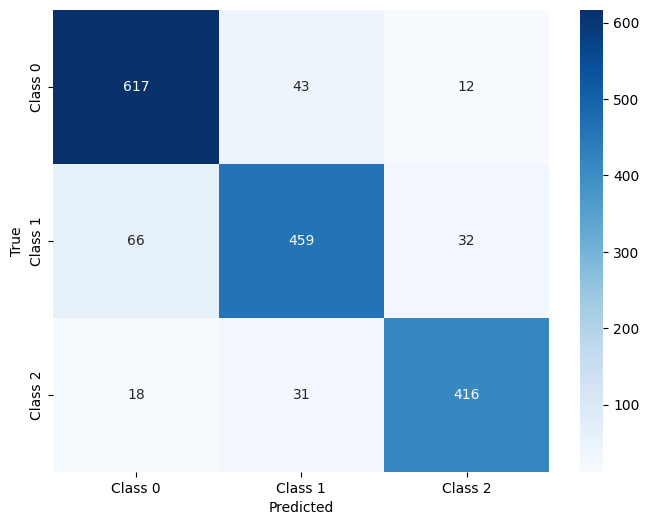

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_mat = confusion_matrix(y_test_, z)
print(conf_mat)
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# Specify the path in Google Drive
model_save_path = '/content/drive/MyDrive/my_model_eff2.h5'

# Save the model to the specified path
model.save(model_save_path)

In [30]:
from tensorflow.keras.models import load_model

# Specify the path in Google Drive
model_load_path = '/content/drive/MyDrive/my_model_eff2.h5'

# Load the model from the specified path
loaded_model = load_model(model_load_path)

In [31]:
from google.colab import files

# Specify the path in Google Drive
file_path = '/content/drive/MyDrive/my_model_eff2.h5'

# Download the file to your local machine
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>